In [1]:
from matplotlib import pyplot as plt

In [2]:
import math
import copy

class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
def dist(p1, p2):
    return math.sqrt((p1.x - p2.x) *
                     (p1.x - p2.x) +
                     (p1.y - p2.y) *
                     (p1.y - p2.y))


def bruteForce(P, n):
    min_val = float('inf')
    for i in range(n):
        for j in range(i + 1, n):
            if dist(P[i], P[j]) < min_val:
                min_val = dist(P[i], P[j])
 
    return min_val

def stripClosest(strip, size, d):       
    min_val = d
 
    for i in range(size):
        j = i + 1
        while j < size and (strip[j].y -
                            strip[i].y) < min_val:
            min_val = dist(strip[i], strip[j])
            j += 1
 
    return min_val
 
def closestUtil(P, Q, n):
    if n <= 3:
        return bruteForce(P, n)
 
    mid = n // 2
    midPoint = P[mid]
 
    Pl = P[:mid]
    Pr = P[mid:]
 
    dl = closestUtil(Pl, Q, mid)
    dr = closestUtil(Pr, Q, n - mid)
 
    d = min(dl, dr)
 
    stripP = []
    stripQ = []
    lr = Pl + Pr
    for i in range(n):
        if abs(lr[i].x - midPoint.x) < d:
            stripP.append(lr[i])
        if abs(Q[i].x - midPoint.x) < d:
            stripQ.append(Q[i])
 
    stripP.sort(key = lambda point: point.y) #<-- REQUIRED
    min_a = min(d, stripClosest(stripP, len(stripP), d))
    min_b = min(d, stripClosest(stripQ, len(stripQ), d))
    
    return min(min_a,min_b)
 

def closest(P, n):
    P.sort(key = lambda point: point.x)
    Q = copy.deepcopy(P)
    Q.sort(key = lambda point: point.y)   
 
    return closestUtil(P, Q, n)
 


In [3]:
P = []

# ler entradas
print("digite -1 para uma das entradas para sair do loop")
print("digite a posição dos aviões")
aux1 , aux2 = 0, 0
while(1):
    print("Entradas")
    print()
    
    
    aux1 = float(input("X:"))
    if aux1 == -1 or aux2 == -1:
        break
    aux2 = float(input("Y:"))
    if aux1 == -1 or aux2 == -1:
        break
    
    print()
    
    P.append(Point(aux1, aux2))

digite -1 para uma das entradas para sair do loop
digite a posição dos aviões
Entradas

X:7.2
Y:8

Entradas

X:9
Y:7

Entradas

X:5.1
Y:3.7

Entradas

X:7.5
Y:8

Entradas

X:1.2
Y:12

Entradas

X:12
Y:1

Entradas

X:-1


A menor distância é:  0.2999999999999998
A distancia entre dois aviões está muito próxima. Favor avisar chefe de controle de tráfego aéreo!!!


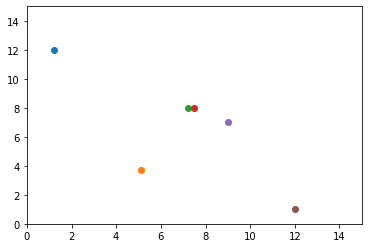

In [4]:
n = len(P)

distancia = closest(P, n)
print("A menor distância é: ", distancia)

if distancia < 2:
    print("A distancia entre dois aviões está muito próxima. Favor avisar chefe de controle de tráfego aéreo!!!")


for i in P:
    plt.plot(i.x, i.y,'o')

plt.axis([0, 15, 0, 15])
plt.show()